In [243]:
# Pandas for DataFrames
import pandas as pd
# NumPy for numerical computing
import numpy as np
# Seaborn for easier visualization
import seaborn as sns
# For data scaling
from sklearn.preprocessing import StandardScaler
# Matplotlib for visualization
import matplotlib.pyplot as plt
# display plots in the notebook
%matplotlib inline

In [235]:
#Read the training data using pandas as a csv
df_heart = pd.read_csv ("heart_train_values.csv")
#Read the labels using pandas as a csv
df_heart_labels =  pd.read_csv ("heart_train_labels.csv")
df_heart.head(2)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0


In [236]:
#Merge the labels and the data to get one dataframe with everything
df_heart = pd.merge(df_heart, df_heart_labels, on="patient_id")
df_heart.set_index('patient_id', inplace=True)

In [233]:
#Do a Sanity check by printing the columns, shapes and data types
print("--C O L U M N S--")
print(df_heart.columns)
print("\n--S H A P E--")
print(df_heart.shape)
print("\n--D A T A   T Y P E S--")
print(df_heart.dtypes)
print("\n--H E A R T   D I S E A S E   P R E S E N T   C O U N T S--")
print(df_heart["heart_disease_present"].value_counts())

--C O L U M N S--
Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

--S H A P E--
(180, 14)

--D A T A   T Y P E S--
slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rat

In [237]:
#Run the summary of the data to understand it better
df_heart.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


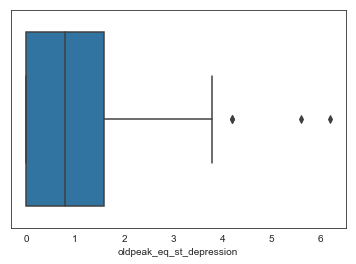

In [238]:
#Run a box plot on oldpeak_eq_st_depression as the summary shows outliers
sns.boxplot(x="oldpeak_eq_st_depression", data=df_heart)

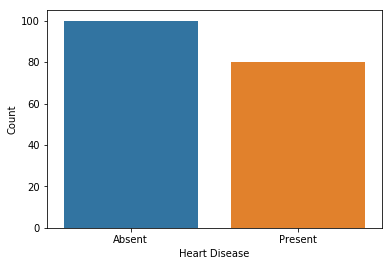

In [39]:
#First plot to get an understanding of the target variable whether it is skewed
sns.countplot(x="heart_disease_present", data=df_heart)
plt.xticks([0,1],["Absent","Present"])
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.savefig("Heart Disease counts.png")

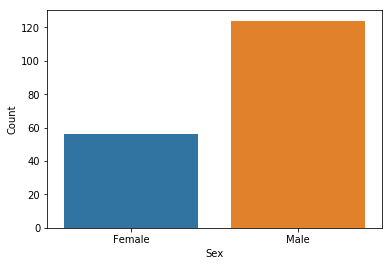

In [41]:
#Plot 2 - get an idea of the distribution of data using sex indicator
sns.countplot(x="sex", data=df_heart)
plt.xticks([0,1],["Female","Male"])
plt.xlabel("Sex")
plt.ylabel("Count")
plt.savefig("Sex compare.png")

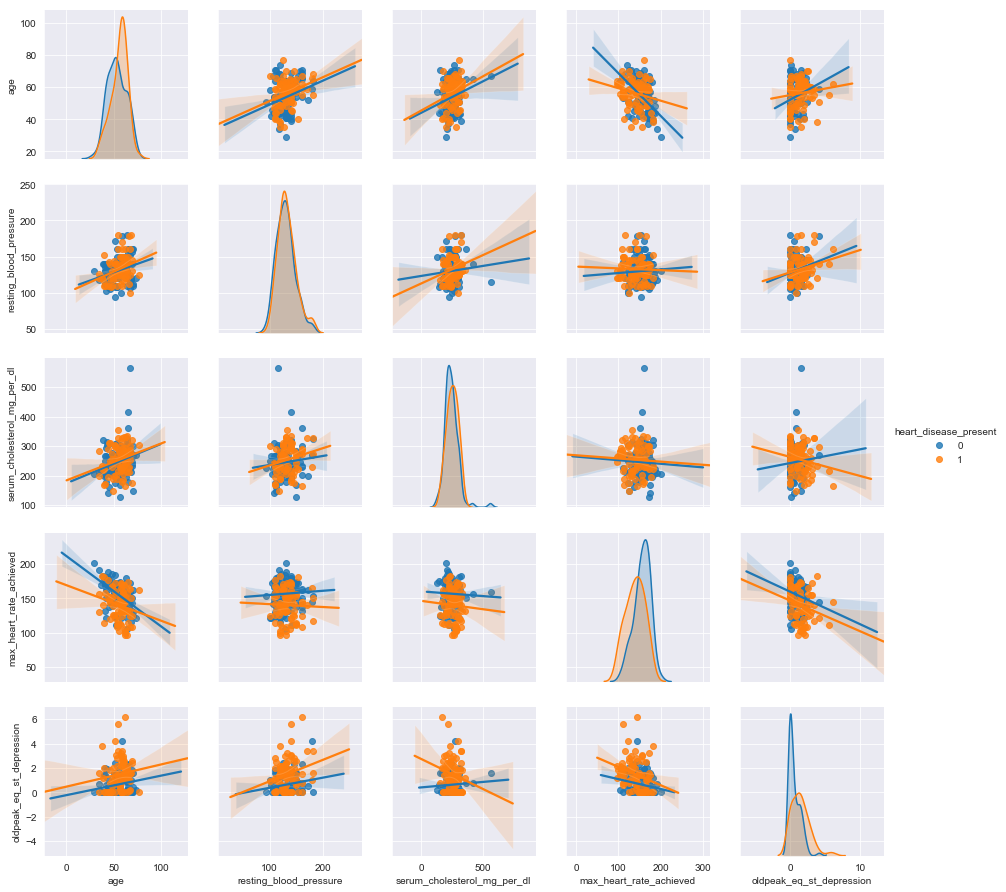

<Figure size 1152x1008 with 0 Axes>

In [74]:
#Create a subset of the data to remove the categorical, binary and ordered data
#Do a regression line and use indicator variable 
g = sns.pairplot(df_heart, vars =['age', 'resting_blood_pressure','serum_cholesterol_mg_per_dl',
                                  'max_heart_rate_achieved','oldpeak_eq_st_depression'], 
                 kind='reg', hue='heart_disease_present')
plt.figure(figsize=(16,14))
plt.savefig("Pair plots of numeric vars.png")
#Some observations
#Resting blood pressure tends to increase with age regardless of heart disease 
#We can see that max heart rates acheived is significantly higher for people without heart disease.
#Age is lower for people without heart disease
#Resting blood pressure doesn't seem to have any correlation with heart disease
#oldPeak is higher for people without heart disease

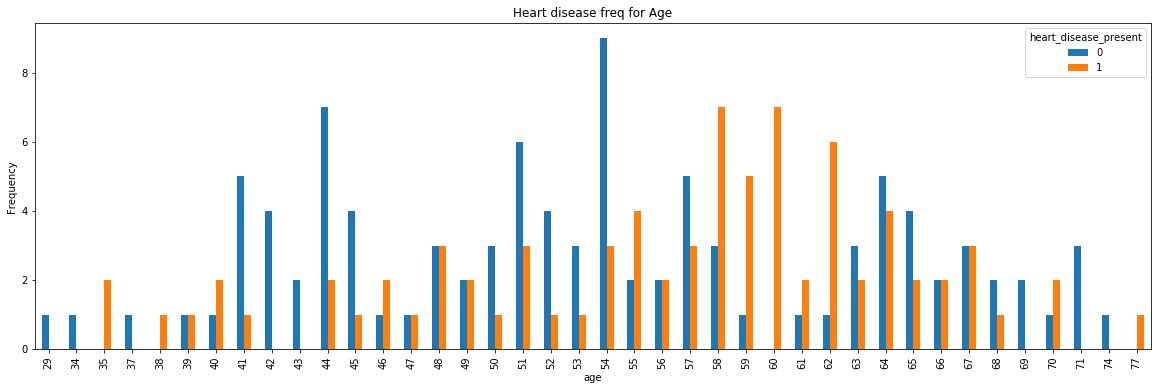

In [42]:
pd.crosstab(df_heart.age, df_heart.heart_disease_present).plot(kind="bar", figsize=(20,6))
plt.ylabel("Frequency")
plt.title('Heart disease freq for Age')
plt.savefig('Freq for Age.png')

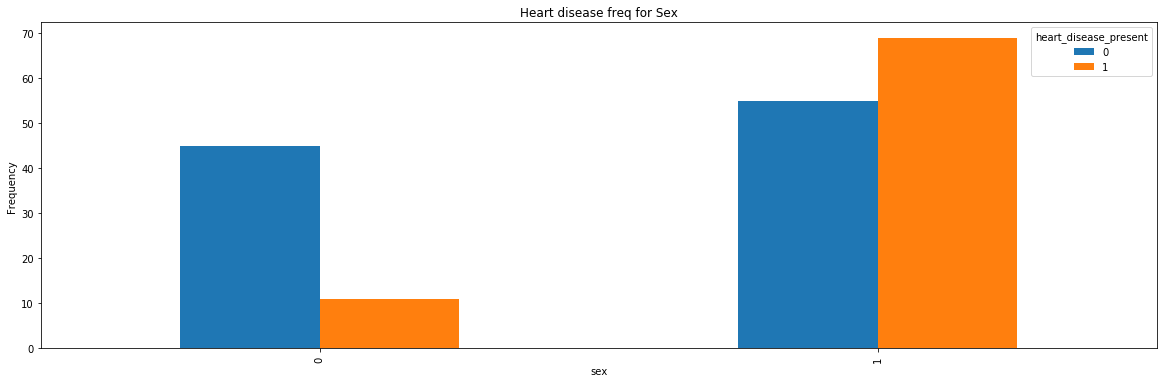

In [50]:
pd.crosstab(df_heart.sex, df_heart.heart_disease_present).plot(kind="bar", figsize=(20,6))
plt.ylabel("Frequency")
plt.title('Heart disease freq for Sex')
plt.savefig('Freq for Sex.png')

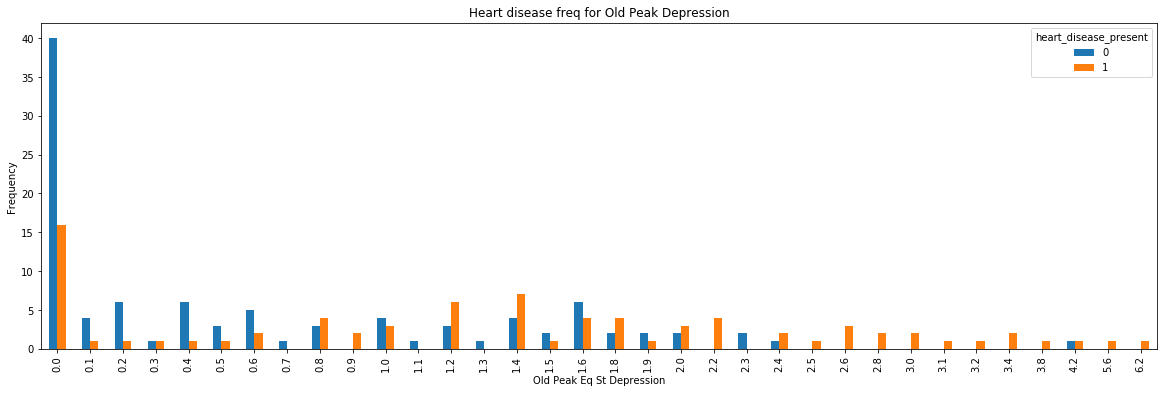

In [43]:
pd.crosstab(df_heart.oldpeak_eq_st_depression, df_heart.heart_disease_present).plot(kind="bar", figsize=(20,6))
plt.ylabel("Frequency")
plt.xlabel("Old Peak Eq St Depression")
plt.title('Heart disease freq for Old Peak Depression')
plt.savefig('Freq for Old Peak Depression.png')

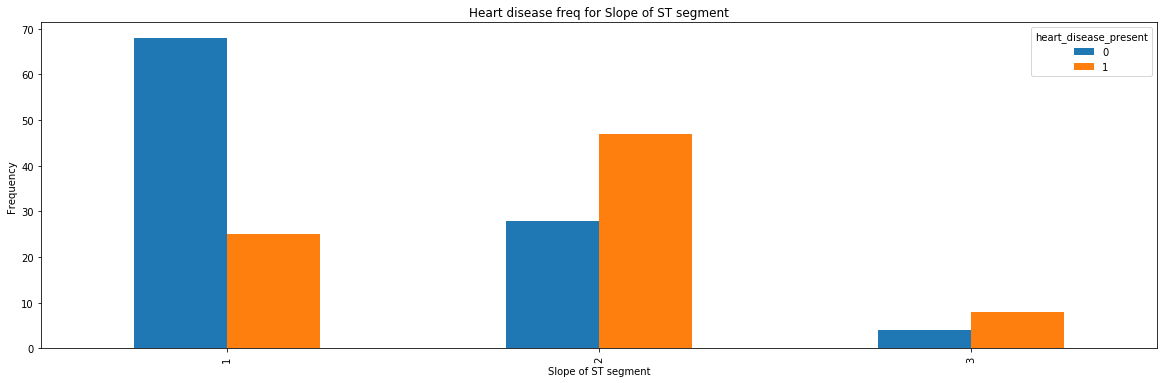

In [44]:
pd.crosstab(df_heart.slope_of_peak_exercise_st_segment, df_heart.heart_disease_present).plot(kind="bar", figsize=(20,6))
plt.ylabel("Frequency")
plt.xlabel("Slope of ST segment")
plt.title('Heart disease freq for Slope of ST segment')
plt.savefig('Freq for Slope of ST seg.png')

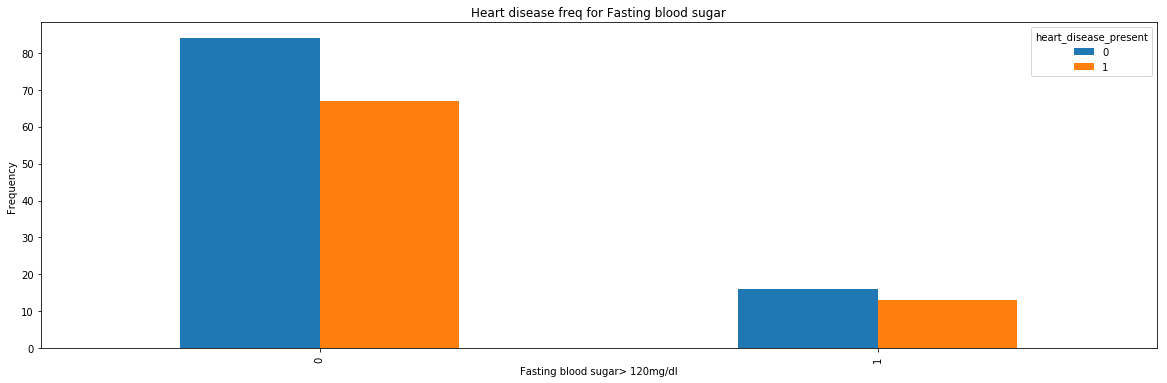

In [45]:
pd.crosstab(df_heart.fasting_blood_sugar_gt_120_mg_per_dl, df_heart.heart_disease_present).plot(kind="bar", figsize=(20,6))
plt.ylabel("Frequency")
plt.xlabel("Fasting blood sugar> 120mg/dl")
plt.title('Heart disease freq for Fasting blood sugar')
plt.savefig('Freq for Fasting blood sugar.png')

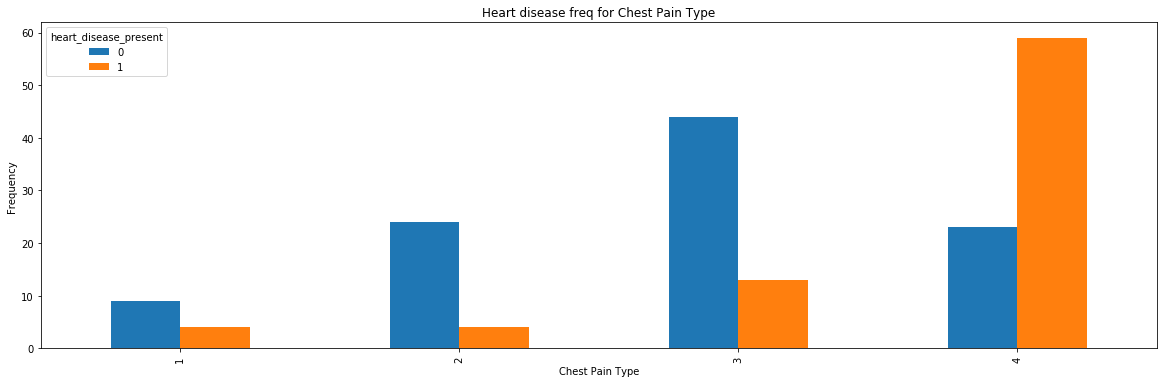

In [46]:
pd.crosstab(df_heart.chest_pain_type, df_heart.heart_disease_present).plot(kind="bar", figsize=(20,6))
plt.ylabel("Frequency")
plt.xlabel("Chest Pain Type")
plt.title('Heart disease freq for Chest Pain Type')
plt.savefig('Freq for Chest Pain Type.png')

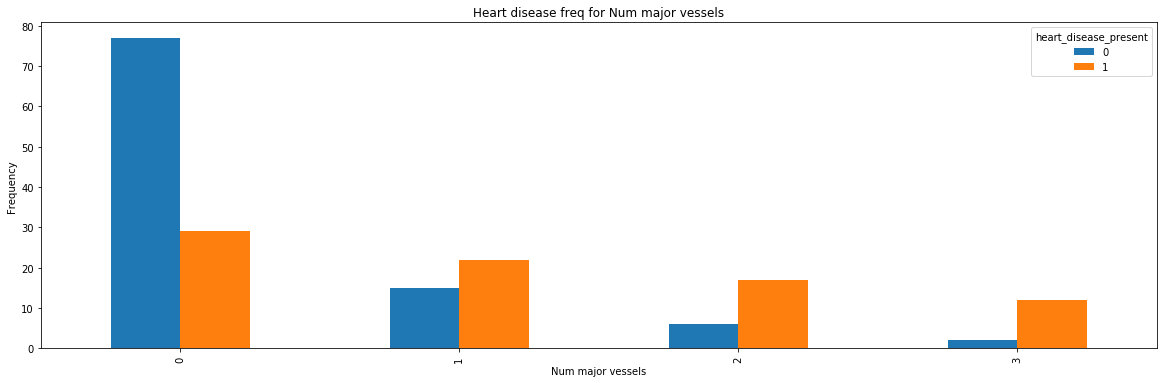

In [47]:
pd.crosstab(df_heart.num_major_vessels, df_heart.heart_disease_present).plot(kind="bar", figsize=(20,6))
plt.ylabel("Frequency")
plt.xlabel("Num major vessels")
plt.title('Heart disease freq for Num major vessels')
plt.savefig('Freq for Num major vessels.png')

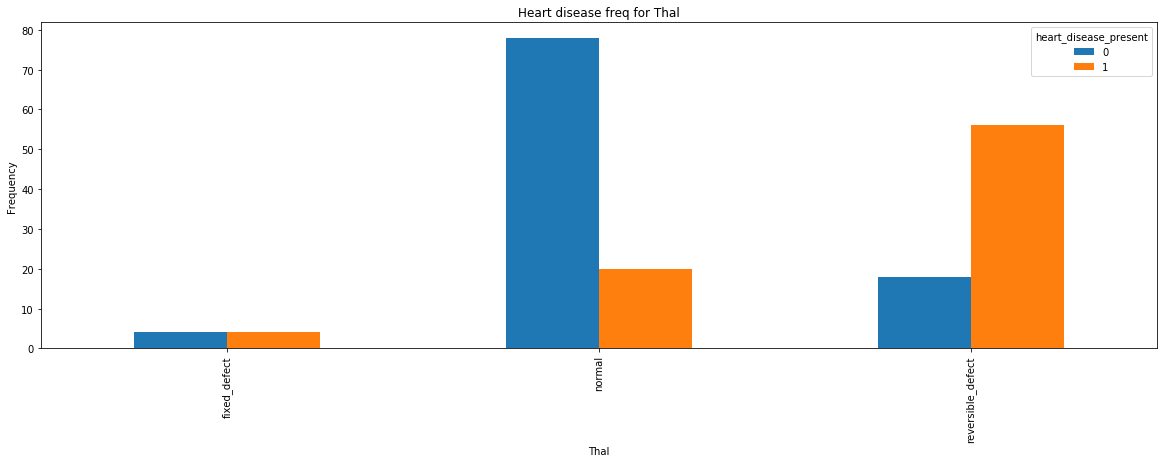

In [48]:
pd.crosstab(df_heart.thal, df_heart.heart_disease_present).plot(kind="bar", figsize=(20,6))
plt.ylabel("Frequency")
plt.xlabel("Thal")
plt.title('Heart disease freq for Thal')
plt.savefig('Freq for Thal.png')

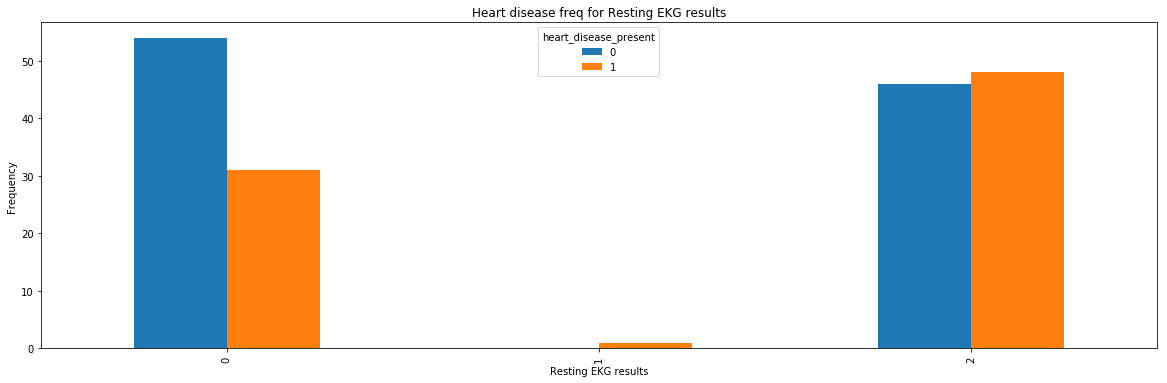

In [49]:
pd.crosstab(df_heart.resting_ekg_results, df_heart.heart_disease_present).plot(kind="bar", figsize=(20,6))
plt.ylabel("Frequency")
plt.xlabel("Resting EKG results")
plt.title('Heart disease freq for Resting EKG results')
plt.savefig('Freq for Resting EKG results.png')

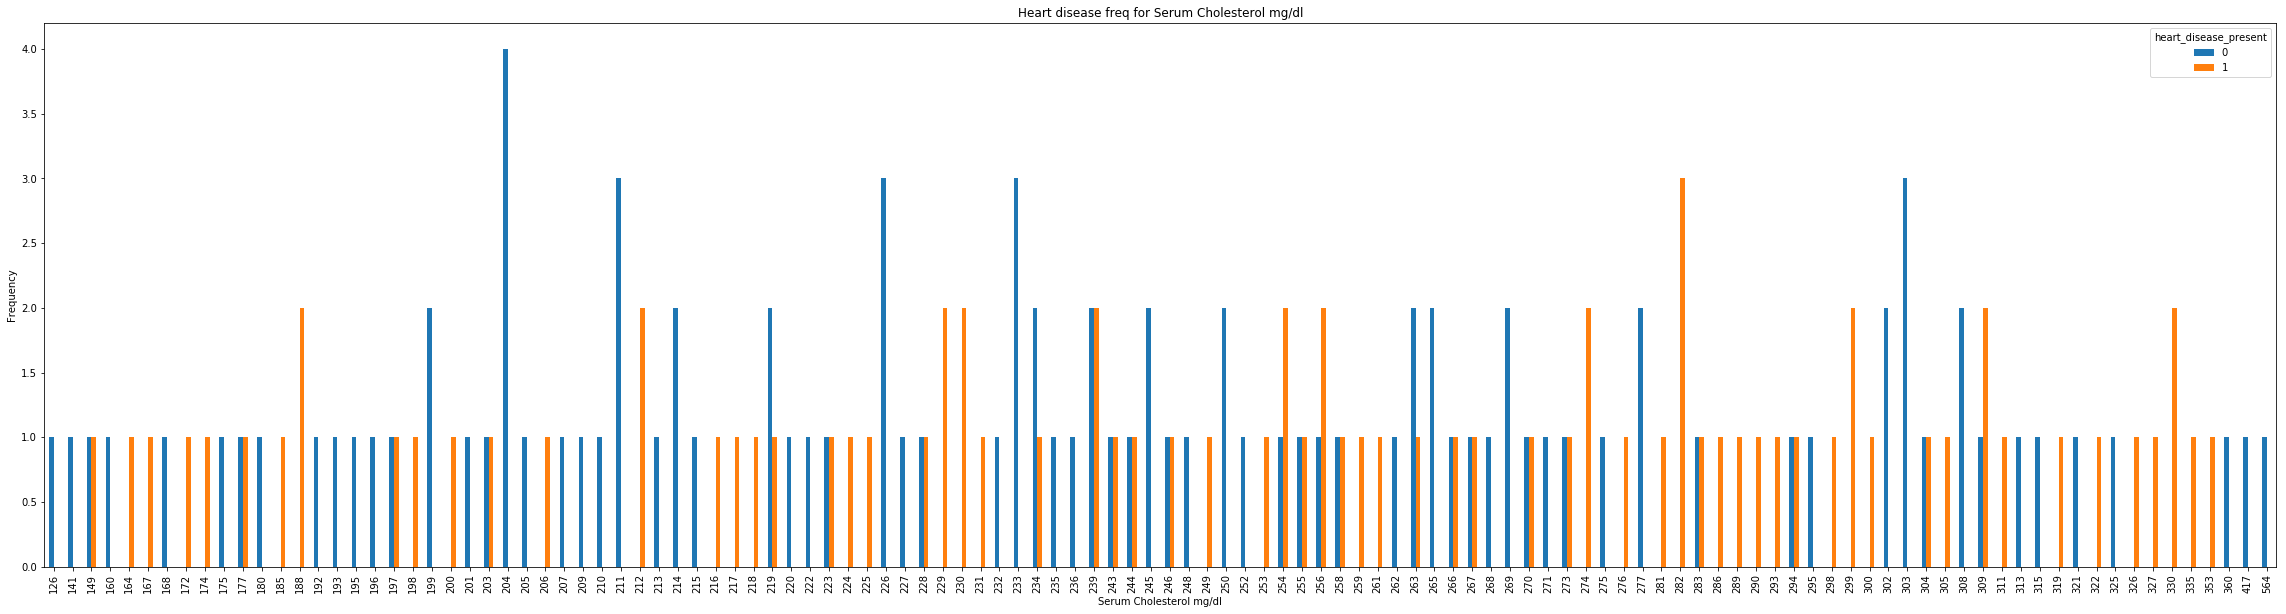

In [28]:
pd.crosstab(df_heart.serum_cholesterol_mg_per_dl, df_heart.heart_disease_present).plot(kind="bar", figsize=(40,10))
plt.ylabel("Frequency")
plt.xlabel("Serum Cholesterol mg/dl")
plt.title('Heart disease freq for Serum Cholesterol mg/dl')
plt.savefig("Freq for Serum cholesterol.png")

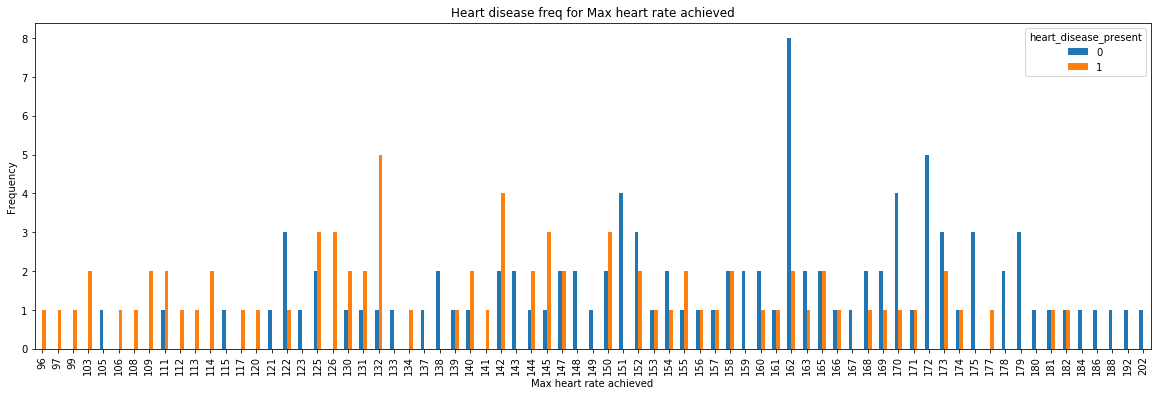

In [29]:
pd.crosstab(df_heart.max_heart_rate_achieved, df_heart.heart_disease_present).plot(kind="bar", figsize=(20,6))
plt.ylabel("Frequency")
plt.xlabel("Max heart rate achieved")
plt.title('Heart disease freq for Max heart rate achieved')
plt.savefig("Freq for Max Heart Rate.png")

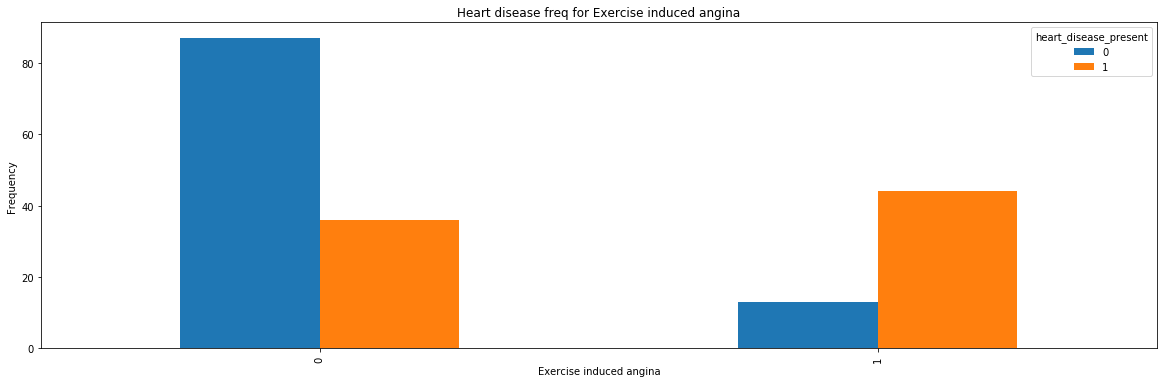

In [30]:
pd.crosstab(df_heart.exercise_induced_angina, df_heart.heart_disease_present).plot(kind="bar", figsize=(20,6))
plt.ylabel("Frequency")
plt.xlabel("Exercise induced angina")
plt.title('Heart disease freq for Exercise induced angina')
plt.savefig("Freq for Exercise Induced.png")

In [110]:
# Calculate correlations between numeric features
correlations = df_heart.corr()

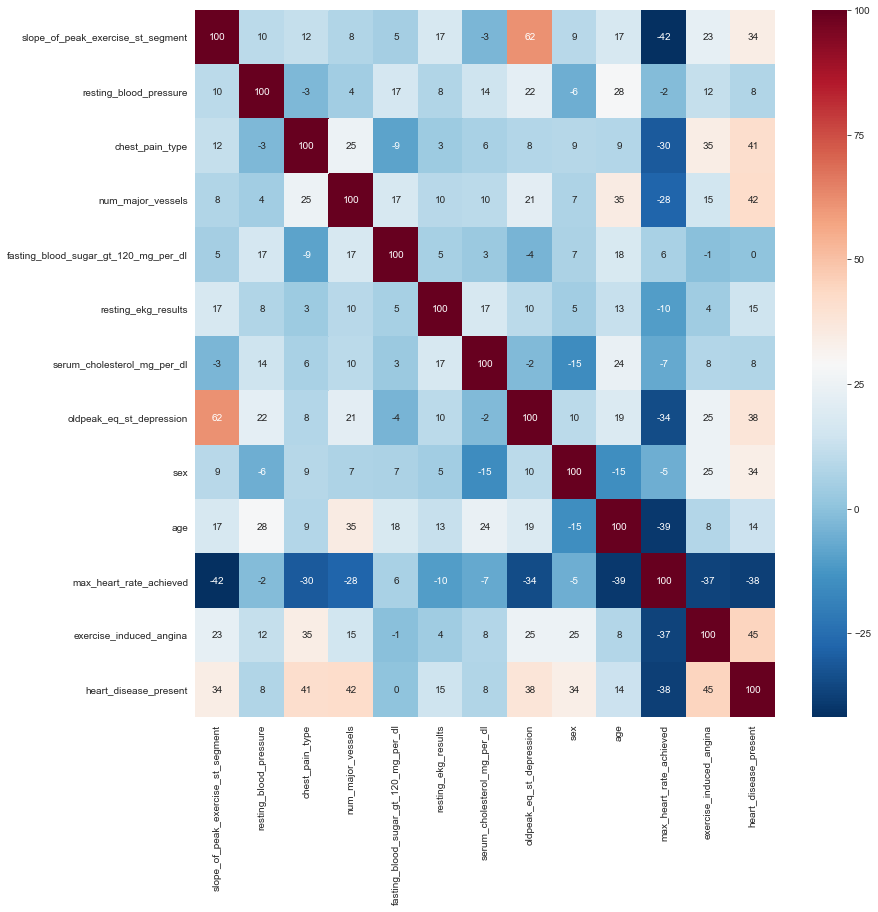

In [241]:
# Increase the figsize to 13 x 13
plt.figure(figsize=(13,13))

# Plot heatmap of correlations
sns.heatmap(correlations * 100,
            cmap='RdBu_r',
            annot=True,
            fmt='.0f',
            cbar= True);
# This figure is not as useful as categorical variables are not expanded, but gives a starting point
plt.savefig("CorrelationHeatMap.png")

In [253]:
# Get dummy variables
df_heart_dummy=pd.get_dummies( df_heart, columns=['slope_of_peak_exercise_st_segment',
                                                  'thal', 
                                                  'chest_pain_type',
                                                  'num_major_vessels',
                                                  'exercise_induced_angina', 
                                                  'sex',
                                                  'resting_ekg_results', 
                                                  'fasting_blood_sugar_gt_120_mg_per_dl'])
# Do a sanity check for how many columns added
df_heart_dummy.shape

(180, 29)

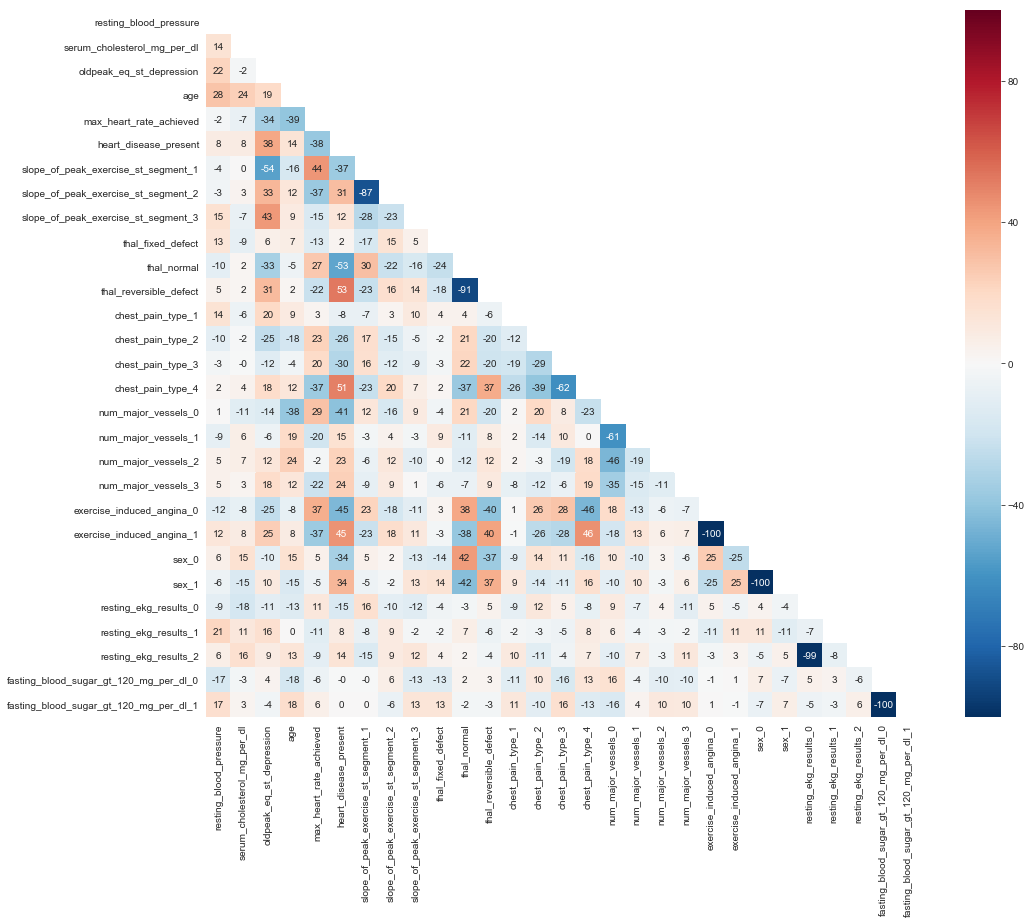

In [252]:
# Increase the figsize to 16 x 13
plt.figure(figsize=(16,13))

# Create a mask
mask = np.zeros_like(df_heart_dummy.corr())
mask[np.triu_indices_from(mask)] = 1

sns.set_style('white')
# Plot heatmap of correlations
sns.heatmap(df_heart_dummy.corr()*100,
            cmap='RdBu_r',
            annot=True,
            fmt='.0f',
            mask=mask,
            cbar= True);
plt.savefig("CorrelationHeatMapWithDummies.png")

In [257]:
#Correlation with output variable
cor_target = abs(df_heart_dummy.corr()["heart_disease_present"])

###########################
#Selecting highly correlated features >0.35. This can be changed to test other features 
###########################
relevant_features = cor_target[cor_target>0.35]
relevant_features

oldpeak_eq_st_depression               0.382930
max_heart_rate_achieved                0.375352
heart_disease_present                  1.000000
slope_of_peak_exercise_st_segment_1    0.365428
thal_normal                            0.528812
thal_reversible_defect                 0.525145
chest_pain_type_4                      0.506362
num_major_vessels_0                    0.411532
exercise_induced_angina_0              0.448647
exercise_induced_angina_1              0.448647
Name: heart_disease_present, dtype: float64